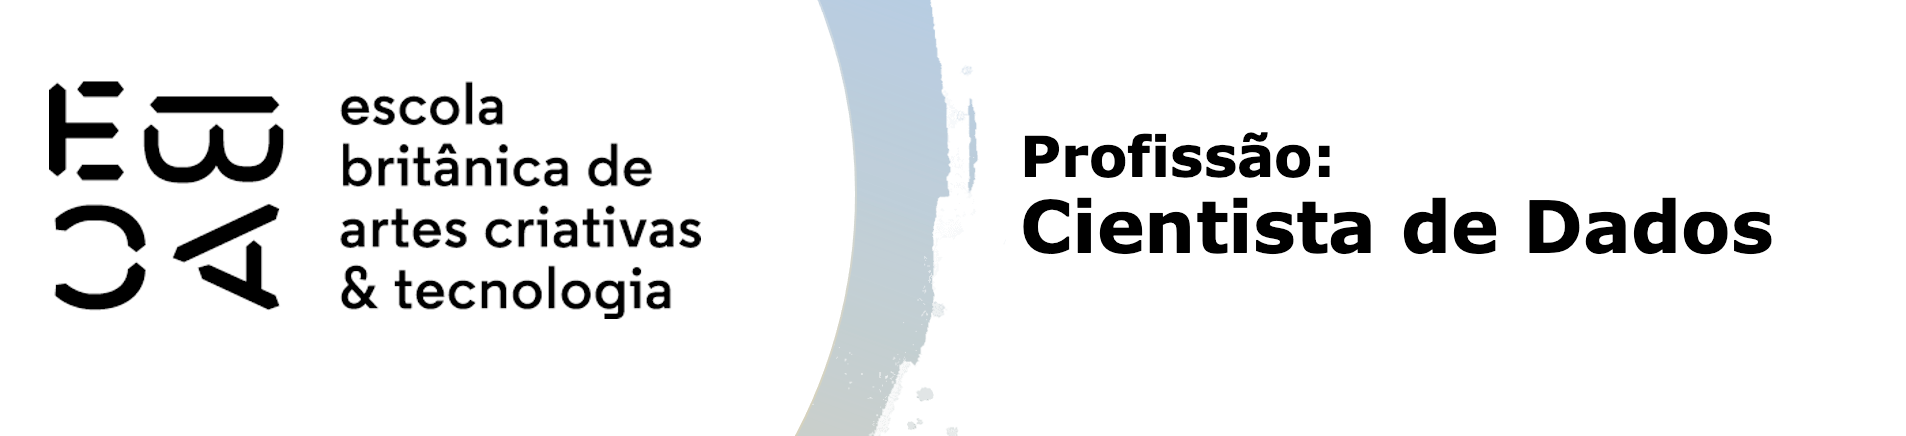

# Regressão III - Tarefa

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('./Dados/previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
def vazios(entrada):
    print(df.shape)
    display(df.isnull().sum())
    if entrada == True:
        df.fillna(df['tempo_emprego'].mean(), inplace=True)
        print(f"Dados vazios preenchidos com a média: {df['tempo_emprego'].mean()}")
        print(f"Total de nulls {df.isnull().sum().sum()}")

In [4]:
vazios(True)

(750000, 13)


index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

Dados vazios preenchidos com a média: 7.746164800507007
Total de nulls 0


### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [5]:
df.index.max()
X_train = df.loc[df.index >= '2015-12-01']
X_test = df.loc[df.index < '2015-12-01']

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [6]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train = X_train.drop('index',axis=1)
X_test = X_test.drop('index',axis=1)

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [7]:
class AnalisePerfil:
    def __init__(self, dt):
        self.data = dt.copy()
    
    def transformation(self):
        # Irá categorizar o atributo tempo_emprego e transformar o log renda 
        self.data['tempo_emprego_cat'] = pd.qcut(self.data['tempo_emprego'], q=20, duplicates='drop')
        self.data['log_renda'] = np.log(self.data['renda'])
        return self.data
    
    def grupo(self):
        # Vai fazer o agrupamento usando o groupby dos dados, retornando a contagem e médias pedidas.
        grupo = self.data.groupby('tempo_emprego_cat')['log_renda'].agg(['count','mean'])
        grupo['mean_tempo'] = self.data.groupby('tempo_emprego_cat')[['tempo_emprego']].mean().reset_index(drop=True).to_numpy()
        grupo.columns = ['N_observations','log_renda_mean','tempo_emprego_mean']
        return grupo
    
    def grafico(self):
        # Irá gerar o gráfico da comparação, juntamente com o texto da resposta.
        figura = plt.figure(figsize=(16,6))
        figura.suptitle('Comparação gráfica Média do Log da Renda com Média do Tempo')
        outer = gridspec.GridSpec(1,1)

        inner = gridspec.GridSpecFromSubplotSpec(
                                                3, 
                                                1, 
                                                subplot_spec =  outer[0:,0])

        ax = plt.Subplot(figura, inner[0:2])
        figura.add_subplot(ax)
        fig = sns.scatterplot(data=self.data, x='log_renda_mean', y='tempo_emprego_mean', ax=ax)

        ax = plt.Subplot(figura, inner[2])
        figura.add_subplot(ax)
        ax.axis('off')
        texto = """      Analisando como os dados dão uma leve mudada de inclinação nas médias, pode-se considerar usar as ténicas 
    de transformação do X, como também a de segmentação. Acredito que ambas possam captar bem o comportamento 
    dos dados"""
        plt.annotate(texto,xy=(0,0), fontsize=15)    

In [8]:
X = AnalisePerfil(X_train).transformation()
X.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,tempo_emprego_cat,log_renda
0,F,S,N,0,Assalariado,Superior completo,Casado,Casa,56,20.887671,2.0,28655.39,"(20.189, 42.907]",10.263097
1,F,S,N,0,Assalariado,Superior completo,Casado,Casa,28,9.460274,2.0,3241.54,"(9.093, 10.458]",8.083804
2,M,S,S,3,Assalariado,Médio,Casado,Casa,38,2.257534,5.0,1587.26,"(2.106, 2.912]",7.369765
3,F,S,S,0,Pensionista,Médio,Casado,Casa,61,7.746165,2.0,3406.36,"(7.474, 7.746]",8.133400
4,F,N,N,0,Assalariado,Médio,Casado,Casa,51,9.936986,2.0,6323.71,"(9.093, 10.458]",8.752061


In [10]:
grupo = AnalisePerfil(X).grupo()
grupo

,N_observations,log_renda_mean,tempo_emprego_mean
tempo_emprego_cat,,,
"(0.11699999999999999, 0.827]",10146,7.328748,0.521711
"(0.827, 1.468]",9948,7.387040,1.134223
"(1.468, 2.106]",9906,7.521002,1.791140
"(2.106, 2.912]",10018,7.599284,2.513849
"(2.912, 3.636]",10061,7.705422,3.300750
"(3.636, 4.301]",9957,7.785690,3.988797
"(4.301, 4.937]",9987,7.858730,4.617357
"(4.937, 5.759]",10022,7.989470,5.369558
"(5.759, 6.622]",10021,8.094806,6.202152


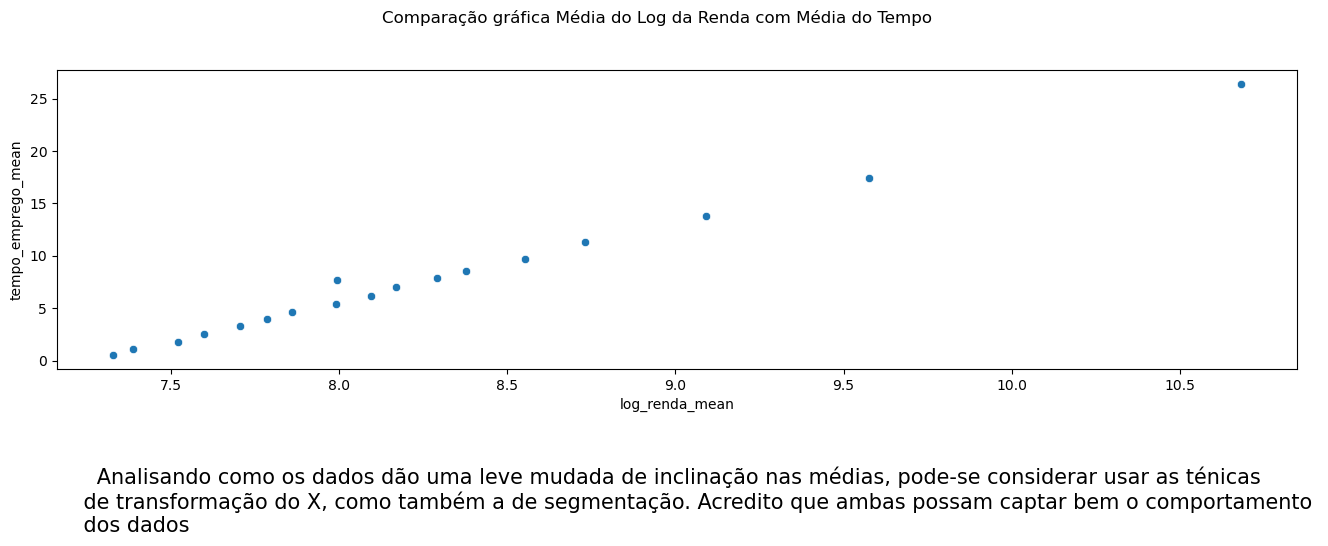

In [11]:
AnalisePerfil(grupo).grafico()

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [12]:
class Linearizar:
    def __init__(self, dt):
        self.data = dt.copy()
    
    def modelo_base(self, teste = None):
        # Modelo comum de regressão linear. Se a base de teste não for passada ele irá retornar o summary
        print("\n\nAnalisando os resultados do modelo simples de regressão linear Tempo Emprego para prever Renda\n\n")
        res = smf.ols('renda ~ I(tempo_emprego)', data=self.data).fit()
        if (teste is not None):
            resultado = res.predict(teste[['tempo_emprego']])
            r2 = (r2_score(teste['renda'], resultado))*100
            return print(f"O r2 score foi de {r2:.2f} %")
        return res.summary()
    
    def transform(self, teste = None):
        # Transformação polinomial dos dados de tempo emprego buscando melhor performance.
        print("\n\nAnalisando os resultados do modelo com transformação linear do Tempo Emprego para prever Renda\n\n")
        res = smf.ols('renda ~ I(tempo_emprego**2) + I(tempo_emprego)', data=self.data).fit()
        if (teste is not None):
            teste['X1'] = teste['tempo_emprego']**2
            resultado = res.predict(teste[['tempo_emprego','X1']])
            r2 = (r2_score(teste['renda'], resultado))*100
            return print(f"O r2 score foi de {r2:.2f} %")
        return res.summary()
    
    def segmentation(self, teste = None, C = 10):
        # Utilizando o método de segmentação dos dados.
        print("\n\nAnalisando os resultados do modelo com segmentação do Tempo Emprego para prever Renda\n\n")
        dt = self.data.copy()
        dt['T_1'] = (dt.tempo_emprego<=C)*dt.tempo_emprego + (dt.tempo_emprego>C)*C
        dt['T_2'] = (dt.tempo_emprego<=C)*0 + (dt.tempo_emprego>C)*(dt.tempo_emprego-C)
        
        res = smf.ols('renda ~ I(T_1) + I(T_2)', data=dt).fit()
        if (teste is not None):
            dt = teste.copy()
            dt['T_1'] = (dt.tempo_emprego<=C)*dt.tempo_emprego + (dt.tempo_emprego>C)*C
            dt['T_2'] = (dt.tempo_emprego<=C)*0 + (dt.tempo_emprego>C)*(dt.tempo_emprego-C)
            resultado = res.predict(dt[['T_1','T_2']])
            r2 = (r2_score(teste['renda'], resultado))*100
            return print(f"O r2 score foi de {r2:.2f} %")
            
        return res.summary()
        

In [13]:
Linearizar(X_train).modelo_base()



Analisando os resultados do modelo simples de regressão linear Tempo Emprego para prever Renda




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                 8.193e+04
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:30:35   Log-Likelihood:            -2.2985e+06
No. Observations:              200000   AIC:                         4.597e+06
Df Residuals:                  199998   BIC:                         4.597e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.059e+04     85.805   -123.453      0.000   -1.08e+04   -1.04e+04
I(tempo_emprego)  2495.2653      8.717    286.241      0.000    2478.179    2512.351
==============================================================================
Omnibus:                   433596.249   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4047081853.212
Skew:                          19.382   Prob(JB):                         0.00
Kurtosis:                     698.807   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
Linearizar(X_train).segmentation(C=15)



Analisando os resultados do modelo com segmentação do Tempo Emprego para prever Renda




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 7.917e+04
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:30:38   Log-Likelihood:            -2.2746e+06
No. Observations:              200000   AIC:                         4.549e+06
Df Residuals:                  199997   BIC:                         4.549e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2619.2963     94.936     27.590      0.000    2433.224    2805.369
I(T_1)       224.6056     12.446     18.046      0.000     200.212     249.000
I(T_2)      6522.4082     18.947    344.253      0.000    6485.273    6559.543
==============================================================================
Omnibus:                   440790.664   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5885544727.060
Skew:                          20.003   Prob(JB):                         0.00
Kurtosis:                     842.443   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
Linearizar(X_train).transform()



Analisando os resultados do modelo com transformação linear do Tempo Emprego para prever Renda




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                 8.797e+04
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:30:40   Log-Likelihood:            -2.2698e+06
No. Observations:              200000   AIC:                         4.540e+06
Df Residuals:                  199997   BIC:                         4.540e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8434.7228    104.644     80.604      0.000    8229.623    8639.823
I(tempo_emprego ** 2)   173.6853      0.673    258.243      0.000     172.367     175.004
I(tempo_emprego)      -2137.8648     19.465   -109.834      0.000   -2176.015   -2099.715
==============================================================================
Omnibus:                   440355.794   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6210036013.365
Skew:                          19.925   Prob(JB):                         0.00
Kurtosis:                     865.332   Cond. No.                         464.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [16]:
Linearizar(X_train).modelo_base(teste=X_test)



Analisando os resultados do modelo simples de regressão linear Tempo Emprego para prever Renda


O r2 score foi de 8.28 %


In [17]:
Linearizar(X_train).transform(teste=X_test)



Analisando os resultados do modelo com transformação linear do Tempo Emprego para prever Renda


O r2 score foi de 15.55 %


In [18]:
Linearizar(X_train).segmentation(teste=X_test, C=18)



Analisando os resultados do modelo com segmentação do Tempo Emprego para prever Renda


O r2 score foi de 15.30 %
